#Data Preprocessing for the Road Accident dataset.


---



Import pandas and numpy libraries for data preprocessing/cleaning.

In [ ]:
import numpy as np
import pandas as pd
from sklearn import preprocessing

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split



---


Import the dataset by mounting google drive to colab and copy path.

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/accident data.csv')



---


Dataset details.

In [ ]:
data.shape

(660679, 14)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Index                    660679 non-null  object 
 1   Accident_Severity        660679 non-null  object 
 2   Accident Date            660679 non-null  object 
 3   Latitude                 660654 non-null  float64
 4   Light_Conditions         660679 non-null  object 
 5   District Area            660679 non-null  object 
 6   Longitude                660653 non-null  float64
 7   Number_of_Casualties     660679 non-null  int64  
 8   Number_of_Vehicles       660679 non-null  int64  
 9   Road_Surface_Conditions  659953 non-null  object 
 10  Road_Type                656159 non-null  object 
 11  Urban_or_Rural_Area      660664 non-null  object 
 12  Weather_Conditions       646551 non-null  object 
 13  Vehicle_Type             660679 non-null  object 
dtypes: f



---


Description of dataset with data.head() / data.tail().

In [ ]:
data.head()

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,05-06-2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,02-07-2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26-08-2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16-08-2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,03-09-2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle


Remove unneeded/irrelevant features from the dataset.

In [ ]:
{column: len(data[column].unique()) for column in data.columns if data.dtypes[column] == 'object'}

{'Index': 421020,
 'Accident_Severity': 3,
 'Accident Date': 1461,
 'Light_Conditions': 5,
 'District Area': 422,
 'Road_Surface_Conditions': 6,
 'Road_Type': 6,
 'Urban_or_Rural_Area': 4,
 'Weather_Conditions': 9,
 'Vehicle_Type': 16}

In [ ]:
unneeded_columns = ['Index','District Area','Latitude','Longitude','Accident Date']
data = data.drop(unneeded_columns, axis=1)

In [ ]:
{column: len(data[column].unique()) for column in data.columns if data.dtypes[column] == 'object'}

{'Accident_Severity': 3,
 'Accident Date': 1461,
 'Light_Conditions': 5,
 'Road_Surface_Conditions': 6,
 'Road_Type': 6,
 'Urban_or_Rural_Area': 4,
 'Weather_Conditions': 9,
 'Vehicle_Type': 16}



---

In [ ]:
data['Accident_Severity'].value_counts()

Accident_Severity
Slight     563801
Serious     88217
Fatal        8661
Name: count, dtype: int64

In [ ]:
data['Accident_Severity'] = data['Accident_Severity'].replace(['Fatal'],'Serious')

In [ ]:
data['Road_Surface_Conditions'].value_counts()

Road_Surface_Conditions
Dry                     447821
Wet or damp             186708
Frost or ice             18517
Snow                      5890
Flood over 3cm. deep      1017
Name: count, dtype: int64

In [ ]:
data['Road_Surface_Conditions'] = data['Road_Surface_Conditions'].replace(['Snow','Frost or ice','Flood over 3cm. deep'],'Frost or Snow')

In [ ]:
data['Number_of_Casualties'] = data['Number_of_Casualties'].replace([11,13,12,15,14,17,19,16,18,22,29,21,42,40,27,24,28,47,26,48,32,45,62,25,43],0)
data['Number_of_Vehicles'] = data['Number_of_Vehicles'].replace([11,14,12,13,16,15,32],0)

In [ ]:
data.drop(data[data['Number_of_Casualties'] == 0].index, inplace = True)
data.drop(data[data['Number_of_Vehicles'] == 0].index, inplace = True)

In [ ]:
data['Road_Type'].value_counts()

Road_Type
Single carriageway    492043
Dual carriageway       99341
Roundabout             43987
One way street         13556
Slip road               7035
Name: count, dtype: int64

In [ ]:
data.drop(data[data['Road_Type'] == 'Slip road'].index, inplace = True)

In [ ]:
data['Light_Conditions'].value_counts()

Light_Conditions
Daylight                       479488
Darkness - lights lit          127987
Darkness - no lighting          37064
Darkness - lighting unknown      6398
Darkness - lights unlit          2509
Name: count, dtype: int64

In [ ]:
data['Light_Conditions'] = data['Light_Conditions'].replace(['Darkness - lighting unknown','Darkness - lights unlit','Darkness - no lighting','Darkness - lights lit'],'Darkness')

In [ ]:
data['Urban_or_Rural_Area'].value_counts()

Urban_or_Rural_Area
Urban          418847
Rural          234573
Unallocated        11
Name: count, dtype: int64

In [ ]:
data.drop(data[data['Urban_or_Rural_Area'] == 'Unallocated'].index, inplace = True)

In [ ]:
data['Weather_Conditions'].value_counts()

Weather_Conditions
Fine no high winds       515223
Raining no high winds     78794
Other                     16967
Raining + high winds       9506
Fine + high winds          8442
Snowing no high winds      6167
Fog or mist                3487
Snowing + high winds        874
Name: count, dtype: int64

In [ ]:
data['Weather_Conditions'] = data['Weather_Conditions'].replace(['Raining no high winds','Raining + high winds'],'Raining')
data['Weather_Conditions'] = data['Weather_Conditions'].replace(['Fine no high winds','Fine + high winds'],'Fine')
data['Weather_Conditions'] = data['Weather_Conditions'].replace(['Snowing no high winds','Fog or mist','Snowing + high winds','Other'],'Snowing or Fog')

In [ ]:
data['Weather_Conditions'].value_counts()

Weather_Conditions
Fine                   523665
Raining                 88300
Snowing/Fog or mist     27495
Name: count, dtype: int64

In [ ]:
data['Vehicle_Type'].value_counts()

Vehicle_Type
Car                                      492537
Van / Goods 3.5 tonnes mgw or under       33791
Bus or coach (17 or more pass seats)      25587
Motorcycle over 500cc                     25365
Goods 7.5 tonnes mgw and over             17116
Motorcycle 125cc and under                15118
Taxi/Private hire car                     13165
Motorcycle over 125cc and up to 500cc      7554
Motorcycle 50cc and under                  7513
Goods over 3.5t. and under 7.5t            6031
Other vehicle                              5573
Minibus (8 - 16 passenger seats)           1960
Agricultural vehicle                       1920
Pedal cycle                                 195
Data missing or out of range                  6
Ridden horse                                  4
Name: count, dtype: int64

In [ ]:
data['Vehicle_Type'] = data['Vehicle_Type'].replace(['Motorcycle over 500cc','Motorcycle 125cc and under','Motorcycle over 125cc and up to 500cc','Motorcycle 50cc and under'],'Motorcycle')
data['Vehicle_Type'] = data['Vehicle_Type'].replace(['Van / Goods 3.5 tonnes mgw or under','Goods 7.5 tonnes mgw and over','Goods over 3.5t. and under 7.5t'],'Goods Carrier')
data['Vehicle_Type'] = data['Vehicle_Type'].replace(['Taxi/Private hire car'],'Car')
data['Vehicle_Type'] = data['Vehicle_Type'].replace(['Bus or coach (17 or more pass seats)','Minibus (8 - 16 passenger seats)'],'Passenger Vehicles(Minibus or Bus)')
data['Vehicle_Type'] = data['Vehicle_Type'].replace(['Other vehicle','Agricultural vehicle'],'Agricultural or Other heavy vehicle')


In [ ]:
data.drop(data[data['Vehicle_Type'] == 'Data missing or out of range'].index, inplace = True)
data.drop(data[data['Vehicle_Type'] == 'Ridden horse'].index, inplace = True)
data.drop(data[data['Vehicle_Type'] == 'Pedal cycle'].index, inplace = True)

In [ ]:
data['Vehicle_Type'].value_counts()

Vehicle_Type
Car                                    505702
Goods Carrier                           56938
Motorcycle                              55550
Passenger Vehicles(Minibus or Bus)      27547
Agricultural or Other heavy vehicle      7493
Name: count, dtype: int64

In [ ]:
{column: len(data[column].unique()) for column in data.columns if data.dtypes[column] == 'object'}

{'Accident_Severity': 2,
 'Accident Date': 1461,
 'Light_Conditions': 2,
 'Road_Surface_Conditions': 4,
 'Road_Type': 5,
 'Urban_or_Rural_Area': 3,
 'Weather_Conditions': 4,
 'Vehicle_Type': 5}

Replace white spaces in column names with underscores.

In [ ]:
data.columns = data.columns.str.replace(' ','_')

Replace all white spaces from categorical data names with underscores.

In [ ]:
cat_columns =['Light_Conditions',
 'Road_Surface_Conditions',
 'Road_Type',
 'Urban_or_Rural_Area',
 'Weather_Conditions',
 'Vehicle_Type']

In [ ]:
for i in range(len(cat_columns)):
  data[cat_columns[i]].replace(' ','_',regex=True, inplace=True)


Identify missing data / blank rows

In [ ]:
data.isna().sum()

Accident_Severity              0
Accident_Date                  0
Light_Conditions               0
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      720
Road_Type                   4517
Urban_or_Rural_Area           15
Weather_Conditions         13968
Vehicle_Type                   0
dtype: int64

In [ ]:
print("Total missing values:", data.isna().sum().sum())

Total missing values: 19220


In [ ]:
data = data.dropna(axis=0).reset_index(drop=True)

In [ ]:
data.shape

(635523, 10)

In [ ]:
data.head()

,Accident_Severity,Light_Conditions,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,Serious,Darkness,1,2,Dry,Single_carriageway,Urban,Fine,Car
1,Serious,Daylight,1,2,Wet_or_damp,Single_carriageway,Urban,Raining,Car
2,Serious,Daylight,1,4,Dry,Single_carriageway,Urban,Fine,Passenger_Vehicles(Minibus_or_Bus)
3,Serious,Daylight,2,3,Dry,Single_carriageway,Urban,Fine,Car
4,Serious,Daylight,1,2,Dry,Dual_carriageway,Urban,Fine,Goods_Carrier


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 635523 entries, 0 to 635522
Data columns (total 9 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Accident_Severity        635523 non-null  object
 1   Light_Conditions         635523 non-null  object
 2   Number_of_Casualties     635523 non-null  int64 
 3   Number_of_Vehicles       635523 non-null  int64 
 4   Road_Surface_Conditions  635523 non-null  object
 5   Road_Type                635523 non-null  object
 6   Urban_or_Rural_Area      635523 non-null  object
 7   Weather_Conditions       635523 non-null  object
 8   Vehicle_Type             635523 non-null  object
dtypes: int64(2), object(7)
memory usage: 43.6+ MB


In [ ]:
filename = 'Acc_Data_no_hotencode.csv'

In [ ]:
data.to_csv(filename,index=False)

In [ ]:
from google.colab import files
files.download(filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>



---


OneHotEncoding the dataset features from categorical to numerical features.

In [ ]:
{column: len(data[column].unique()) for column in data.columns if data.dtypes[column] == 'object'}

{'Accident_Severity': 2,
 'Light_Conditions': 2,
 'Road_Surface_Conditions': 3,
 'Road_Type': 4,
 'Urban_or_Rural_Area': 2,
 'Weather_Conditions': 3,
 'Vehicle_Type': 5}

In [ ]:
new_data = pd.get_dummies(data, columns = ['Light_Conditions',
 'Road_Surface_Conditions',
 'Road_Type','Urban_or_Rural_Area',
 'Weather_Conditions',
 'Vehicle_Type'])

In [ ]:
new_data.shape

(635523, 22)

In [ ]:
new_data.head()

,Accident_Severity,Number_of_Casualties,Number_of_Vehicles,Light_Conditions_Darkness,Light_Conditions_Daylight,Road_Surface_Conditions_Dry,Road_Surface_Conditions_Frost_or_Snow,Road_Surface_Conditions_Wet_or_damp,Road_Type_Dual_carriageway,Road_Type_One_way_street,...,Urban_or_Rural_Area_Rural,Urban_or_Rural_Area_Urban,Weather_Conditions_Fine,Weather_Conditions_Raining,Weather_Conditions_Snowing/Fog_or_mist,Vehicle_Type_Agricultural_or_Other_heavy_vehicle,Vehicle_Type_Car,Vehicle_Type_Goods_Carrier,Vehicle_Type_Motorcycle,Vehicle_Type_Passenger_Vehicles(Minibus_or_Bus)
0,Serious,1,2,True,False,True,False,False,False,False,...,False,True,True,False,False,False,True,False,False,False
1,Serious,1,2,False,True,False,False,True,False,False,...,False,True,False,True,False,False,True,False,False,False
2,Serious,1,4,False,True,True,False,False,False,False,...,False,True,True,False,False,False,False,False,False,True
3,Serious,2,3,False,True,True,False,False,False,False,...,False,True,True,False,False,False,True,False,False,False
4,Serious,1,2,False,True,True,False,False,True,False,...,False,True,True,False,False,False,False,True,False,False


In [ ]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 635523 entries, 0 to 635522
Data columns (total 22 columns):
 #   Column                                            Non-Null Count   Dtype 
---  ------                                            --------------   ----- 
 0   Accident_Severity                                 635523 non-null  object
 1   Number_of_Casualties                              635523 non-null  int64 
 2   Number_of_Vehicles                                635523 non-null  int64 
 3   Light_Conditions_Darkness                         635523 non-null  bool  
 4   Light_Conditions_Daylight                         635523 non-null  bool  
 5   Road_Surface_Conditions_Dry                       635523 non-null  bool  
 6   Road_Surface_Conditions_Frost_or_Snow             635523 non-null  bool  
 7   Road_Surface_Conditions_Wet_or_damp               635523 non-null  bool  
 8   Road_Type_Dual_carriageway                        635523 non-null  bool  
 9   Road_Type_One_w

In [ ]:
filename = 'Acc_Data_onehot_encoded.csv'

In [ ]:
new_data.to_csv(filename,index=False)

In [ ]:
from google.colab import files
files.download(filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>




---

HeatMap


---



In [ ]:
new_data['Accident'] = new_data['Accident_Severity']

In [ ]:
new_data.head()

,Accident_Severity,Number_of_Casualties,Number_of_Vehicles,Light_Conditions_Darkness,Light_Conditions_Daylight,Road_Surface_Conditions_Dry,Road_Surface_Conditions_Frost_or_Snow,Road_Surface_Conditions_Wet_or_damp,Road_Type_Dual_carriageway,Road_Type_One_way_street,...,Urban_or_Rural_Area_Urban,Weather_Conditions_Fine,Weather_Conditions_Raining,Weather_Conditions_Snowing/Fog_or_mist,Vehicle_Type_Agricultural_or_Other_heavy_vehicle,Vehicle_Type_Car,Vehicle_Type_Goods_Carrier,Vehicle_Type_Motorcycle,Vehicle_Type_Passenger_Vehicles(Minibus_or_Bus),Accident
0,Serious,1,2,True,False,True,False,False,False,False,...,True,True,False,False,False,True,False,False,False,Serious
1,Serious,1,2,False,True,False,False,True,False,False,...,True,False,True,False,False,True,False,False,False,Serious
2,Serious,1,4,False,True,True,False,False,False,False,...,True,True,False,False,False,False,False,False,True,Serious
3,Serious,2,3,False,True,True,False,False,False,False,...,True,True,False,False,False,True,False,False,False,Serious
4,Serious,1,2,False,True,True,False,False,True,False,...,True,True,False,False,False,False,True,False,False,Serious


In [ ]:
new_data = new_data.drop(['Accident_Severity'], axis=1)

In [ ]:
x = new_data.iloc[:,:-1]
y = new_data.iloc[:,-1]

In [ ]:
from sklearn.feature_selection import SelectKBest,chi2

bestfeature = SelectKBest(score_func=chi2, k=10)
bf = bestfeature.fit(x,y)

In [ ]:
score = pd.DataFrame(bf.scores_)
colnames = pd.DataFrame(x.columns)
bf_result = pd.concat([colnames, score], axis='columns')
bf_result.columns = ['Feature','Score']
bf_result.nlargest(10,'Score')

,Feature,Score
11,Urban_or_Rural_Area_Rural,2053.018364
0,Number_of_Casualties,1603.364895
9,Road_Type_Roundabout,1254.446093
1,Number_of_Vehicles,1237.488150
2,Light_Conditions_Darkness,1213.307271
12,Urban_or_Rural_Area_Urban,1160.342988
3,Light_Conditions_Daylight,439.610906
10,Road_Type_Single_carriageway,258.121559
15,Weather_Conditions_Snowing/Fog_or_mist,216.224474
14,Weather_Conditions_Raining,193.577928


Feature Importance

---



In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x,y)

RandomForestClassifier()

In [ ]:
rf.feature_importances_

array([0.25451587, 0.37247478, 0.02459992, 0.0231122 , 0.02012467,
       0.01516967, 0.01394093, 0.01723207, 0.00523292, 0.02226738,
       0.03215282, 0.05680191, 0.04951877, 0.01632232, 0.00956031,
       0.00976259, 0.008089  , 0.01332232, 0.01216815, 0.01237131,
       0.01126008])

<Axes: >

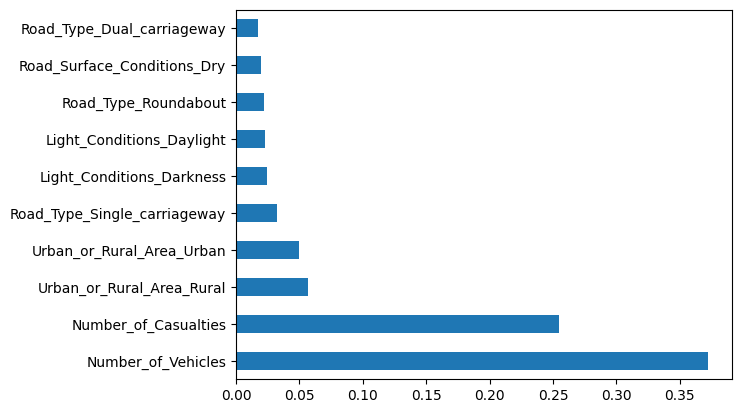

In [ ]:
rf_feature = pd.Series(rf.feature_importances_, index=x.columns)
rf_feature.nlargest(10).plot(kind='barh')

Correlation Matrix with Heatmap

---



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
new_data['Accident'] = new_data['Accident'].replace(['Serious'],0)
new_data['Accident'] = new_data['Accident'].replace(['Slight'],1)

In [ ]:
cor_matrix = new_data.corr()
top_corr_feature = cor_matrix.index

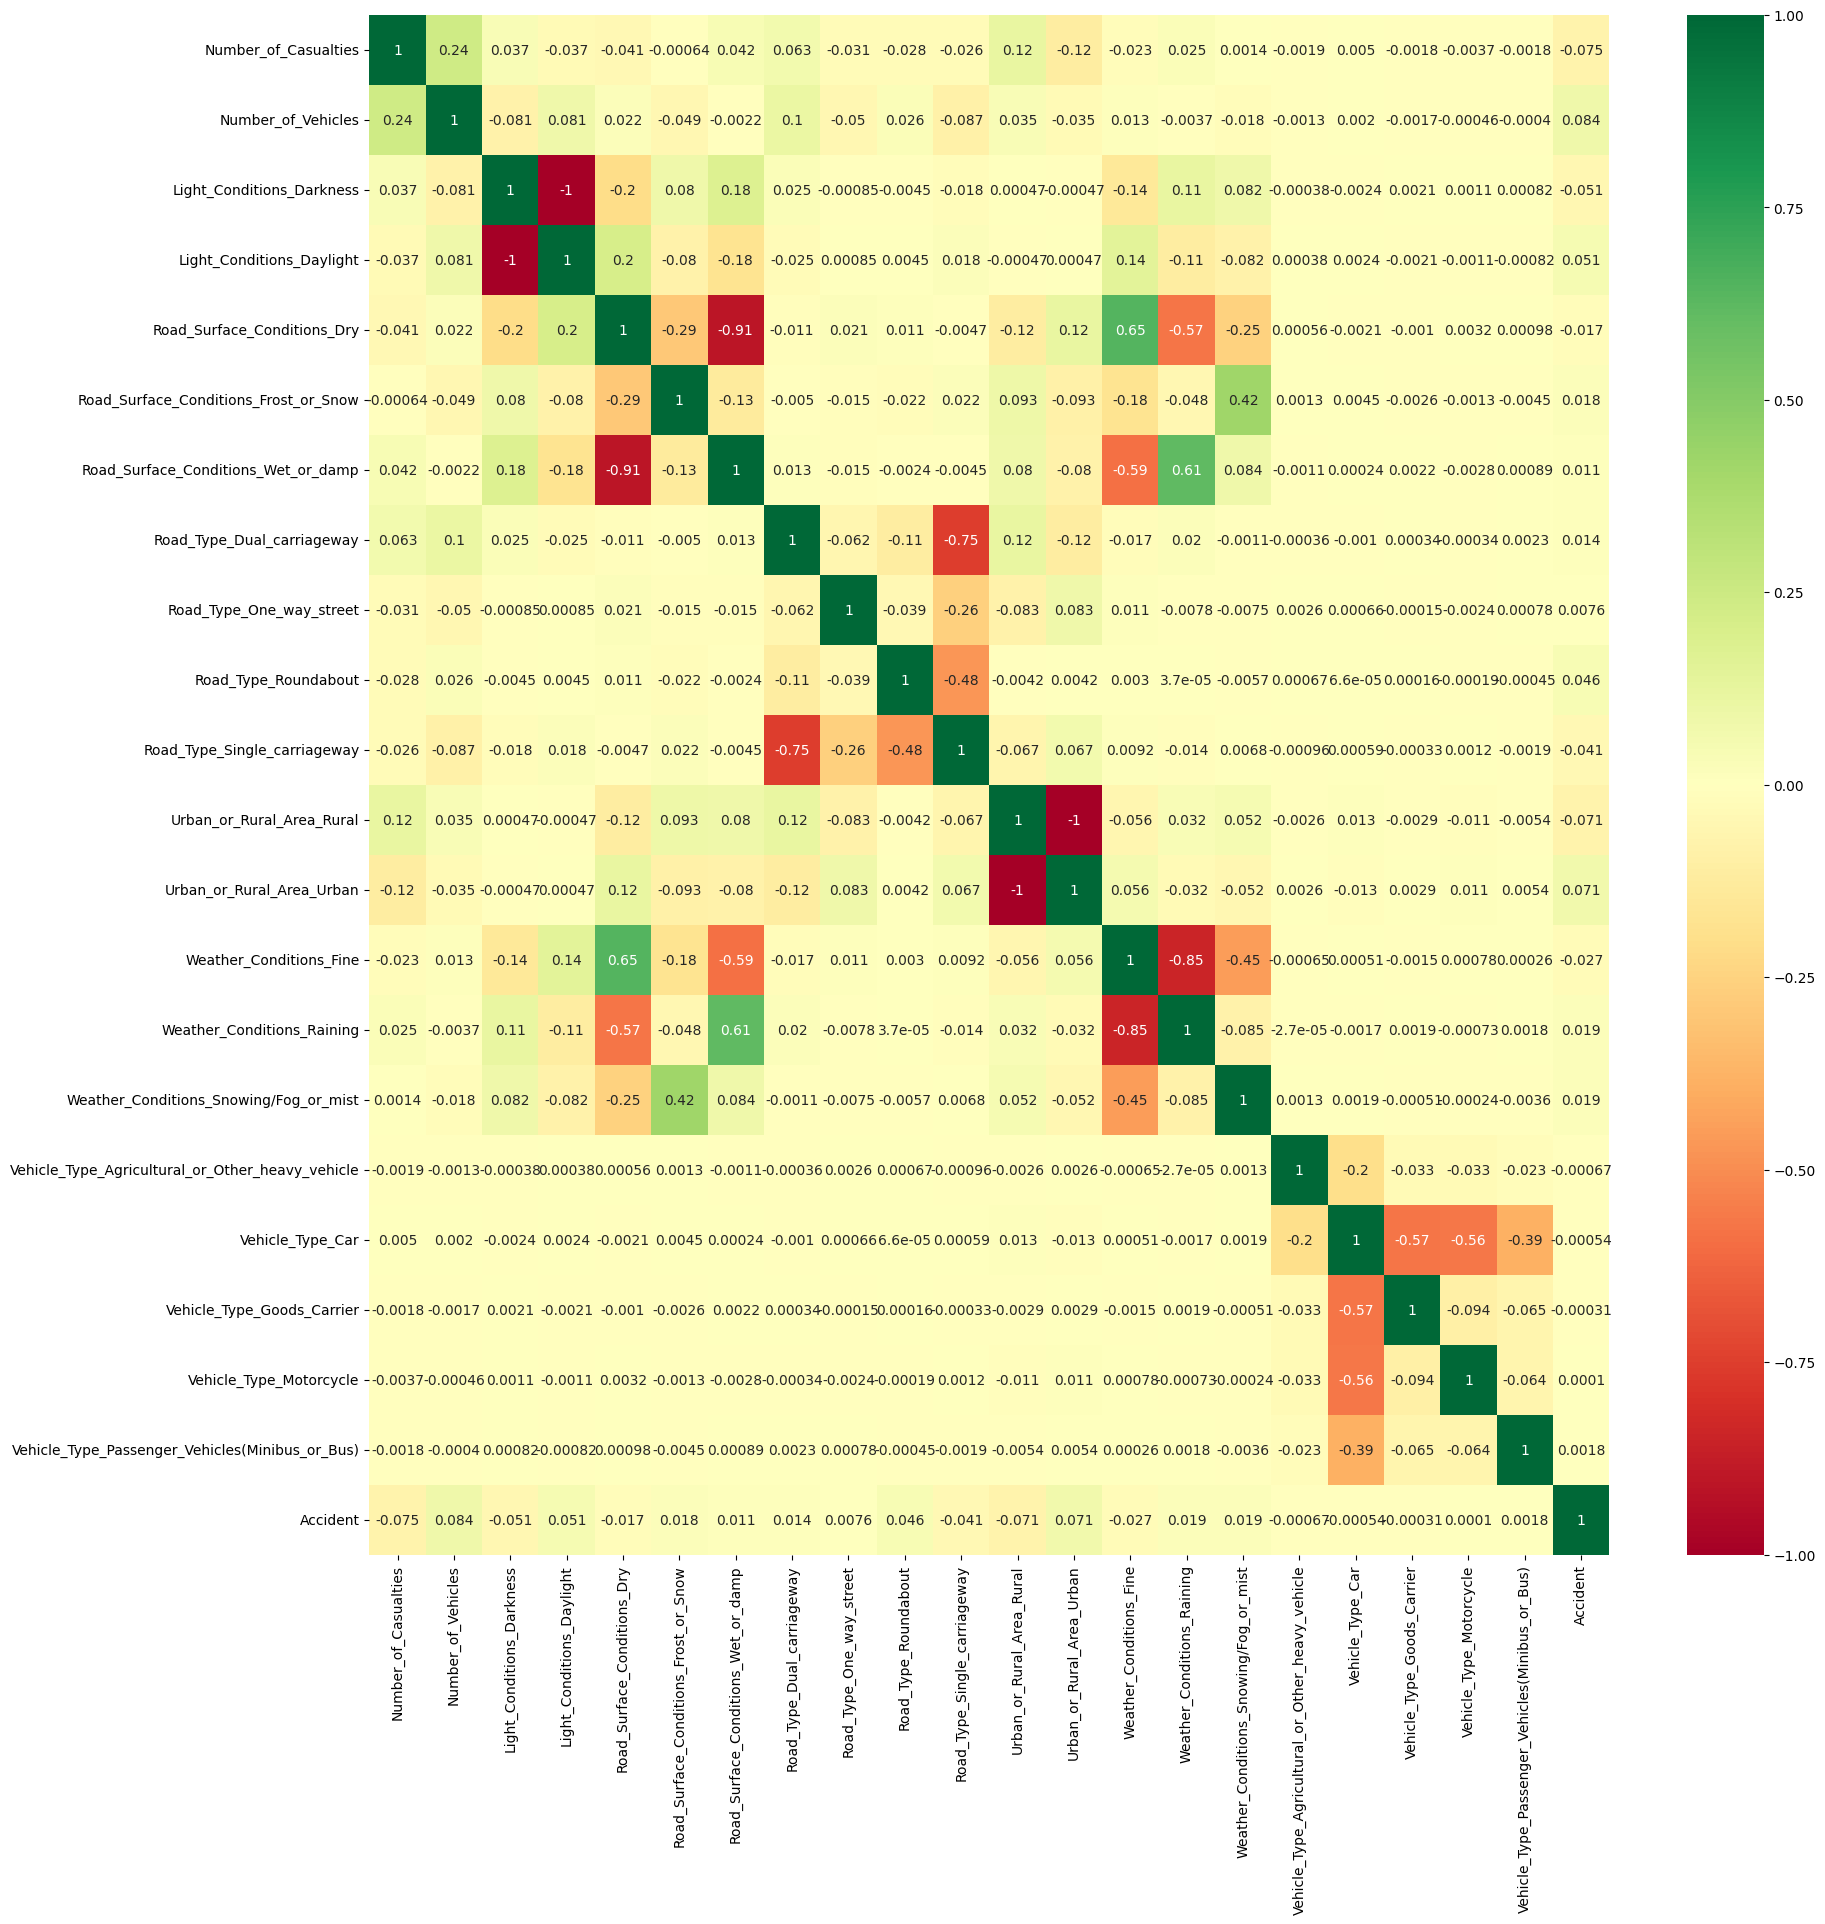

In [ ]:
plt.figure(figsize=(20,20))
g = sns.heatmap(new_data[top_corr_feature].corr(), annot=True, cmap='RdYlGn')